In [1]:
import pandas as pd 
import seaborn as sns
#from ydata_profiling import ProfileReport
#import sweetviz as sv
#import dtale
import numpy as np
import statistics
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import sweetviz  as sv

data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/wine.csv', sep = ',')
df1 = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/model.csv', sep = ',')
df2 = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/wine_cleared.csv', sep = ',')
iris = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/iris.csv', sep = ',')

 # сохраняем очищенный датасет для дальнейшей работы
data = pd.DataFrame(data)
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
iris = pd.DataFrame(iris)


p = print

c:\Users\Admin\Desktop\VS Studio\.venv\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
# Создаем булевую маску на основе дубликатов по всем столбцам
mask = data.duplicated(subset=data.columns) 

# Выбираем строки-дубликаты
data_duplicates = data[mask]

print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

# Удаляем дубликаты из исходного DataFrame и сбрасываем индексы
data = data.drop_duplicates().reset_index(drop=True)


Число найденных дубликатов: 9983


In [3]:
print(data)
print(data.shape)  # Покажет, сколько строк и столбцов в DataFrame
print(type(data))  # Убедитесь, что это DataFrame

         country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
119983   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
119984        US  Citation is given as much as a decade of bottl...   
119985    France  Well-drained gravel soil gives this wine its c...   
119986    France  A dry style of Pinot Gris, this is crisp with ...   
119987    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                

In [4]:
p(data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119988 entries, 0 to 119987
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB
None


<Axes: >

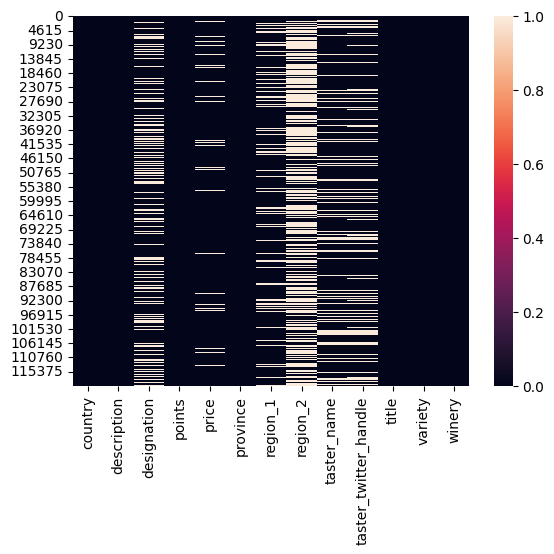

In [5]:
sns.heatmap(data.isnull())

In [6]:
data = data.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

In [7]:
data.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,119929,119988,85443,119988.000000,111593.000000,119929,100428,95071,90542,119988,119987,119988
unique,43,119955,37979,NaN,NaN,425,1229,19,15,118840,707,16757
top,US,"Aromas of citrus, melon and orange blossom sta...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,1871,NaN,NaN,33656,4174,23560,23560,9,12278,211
mean,NaN,NaN,NaN,88.442236,35.620747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092915,42.103728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119988 entries, 0 to 119987
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.0+ MB


In [10]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
profile
profile.to_file("your_report.html")



KeyboardInterrupt



                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

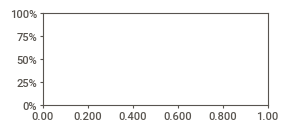

In [ ]:
report = sv.analyze(df)
report.show_html()

In [ ]:

print(np.__version__)
print(sv.__version__)

2.3.2
2.3.1


In [ ]:
d = dtale.show(data)
d

NameError: name 'dtale' is not defined

In [ ]:
print(statistics.mean(data['price']))
print(data['price'].mean())


35.62074682103716
35.620746821037166


In [ ]:
median_value = data['price'].median()
print(median_value)


28.0


In [ ]:
data = data['price'].dropna().tolist()  # Получаем список значений, исключая пропуски
med = statistics.median_low(data)
print(med)

28.0


In [ ]:
count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

61.0

In [ ]:
# Получаем список значений из столбца, исключая пропуски
data = df['price'].dropna().tolist()

# Вычисляем моду
mode_values = statistics.multimode(data)

print(mode_values)

[20.0]


In [ ]:
mode = round(df["price"].value_counts().index[0],2) # Пирсена

In [ ]:
print(data.columns)

RangeIndex(start=0, stop=1, step=1)


In [ ]:
corr_value = df['price'].corr(df['points'])
print(round(corr_value, 6))



0.416167


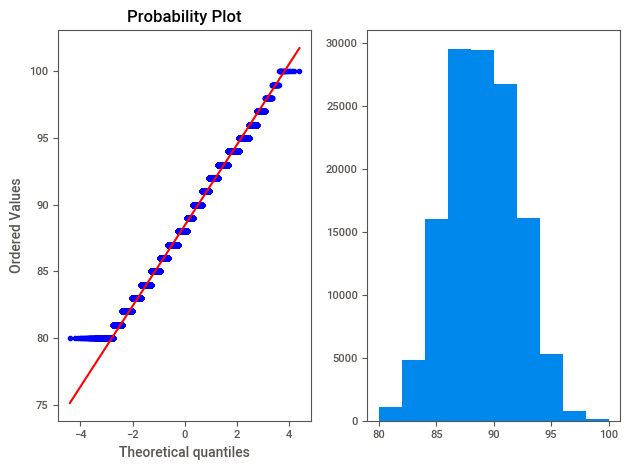

In [ ]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [ ]:
mask = df['price'].corr(df['points'], method = 'spearman') # корреляции Спирмена
p(mask)
mask = df['price'].corr(df['points'], ) #Пирсен
p(mask)
mask = df['price'].corr(df['points'], method = 'kendall') # Кендала
p(mask)

0.6057853020676698
0.41616674186062236
0.45392807307284416


In [ ]:


x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [ ]:

numeric_df = df1.select_dtypes(include='number')
p(numeric_df.corr())


               Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000  


<Axes: >

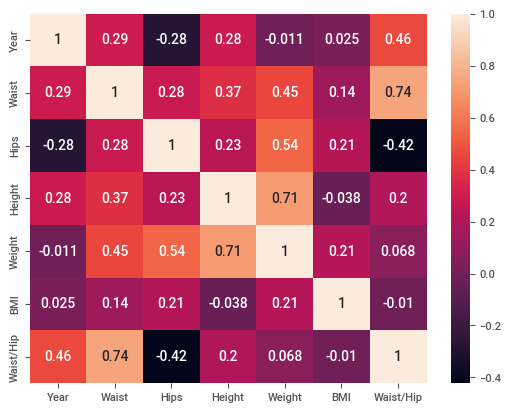

In [ ]:
sns.heatmap(df1.corr(numeric_only=True), annot=True)

0.7422835712578245


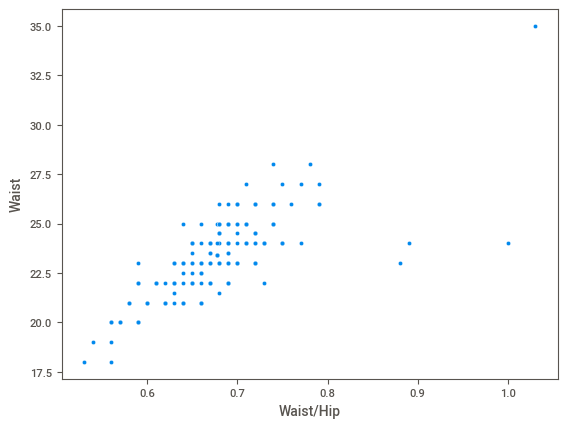

In [ ]:
sns.scatterplot(data=df1, x="Waist/Hip", y="Waist")
p(df1['Waist/Hip'].corr(df1['Waist']))

-0.010752576565617835


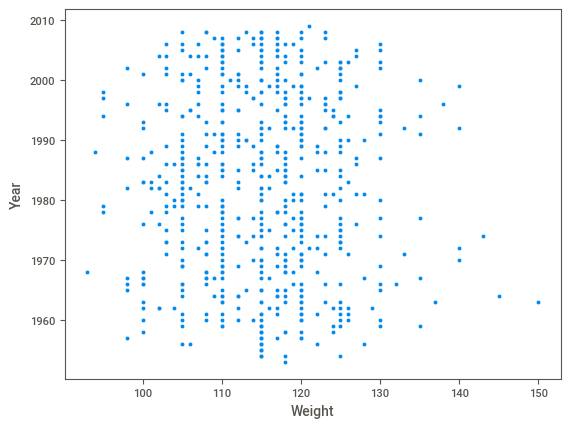

In [ ]:
sns.scatterplot(data=df1, x="Weight", y="Year")
p(df1['Weight'].corr(df1['Year']))

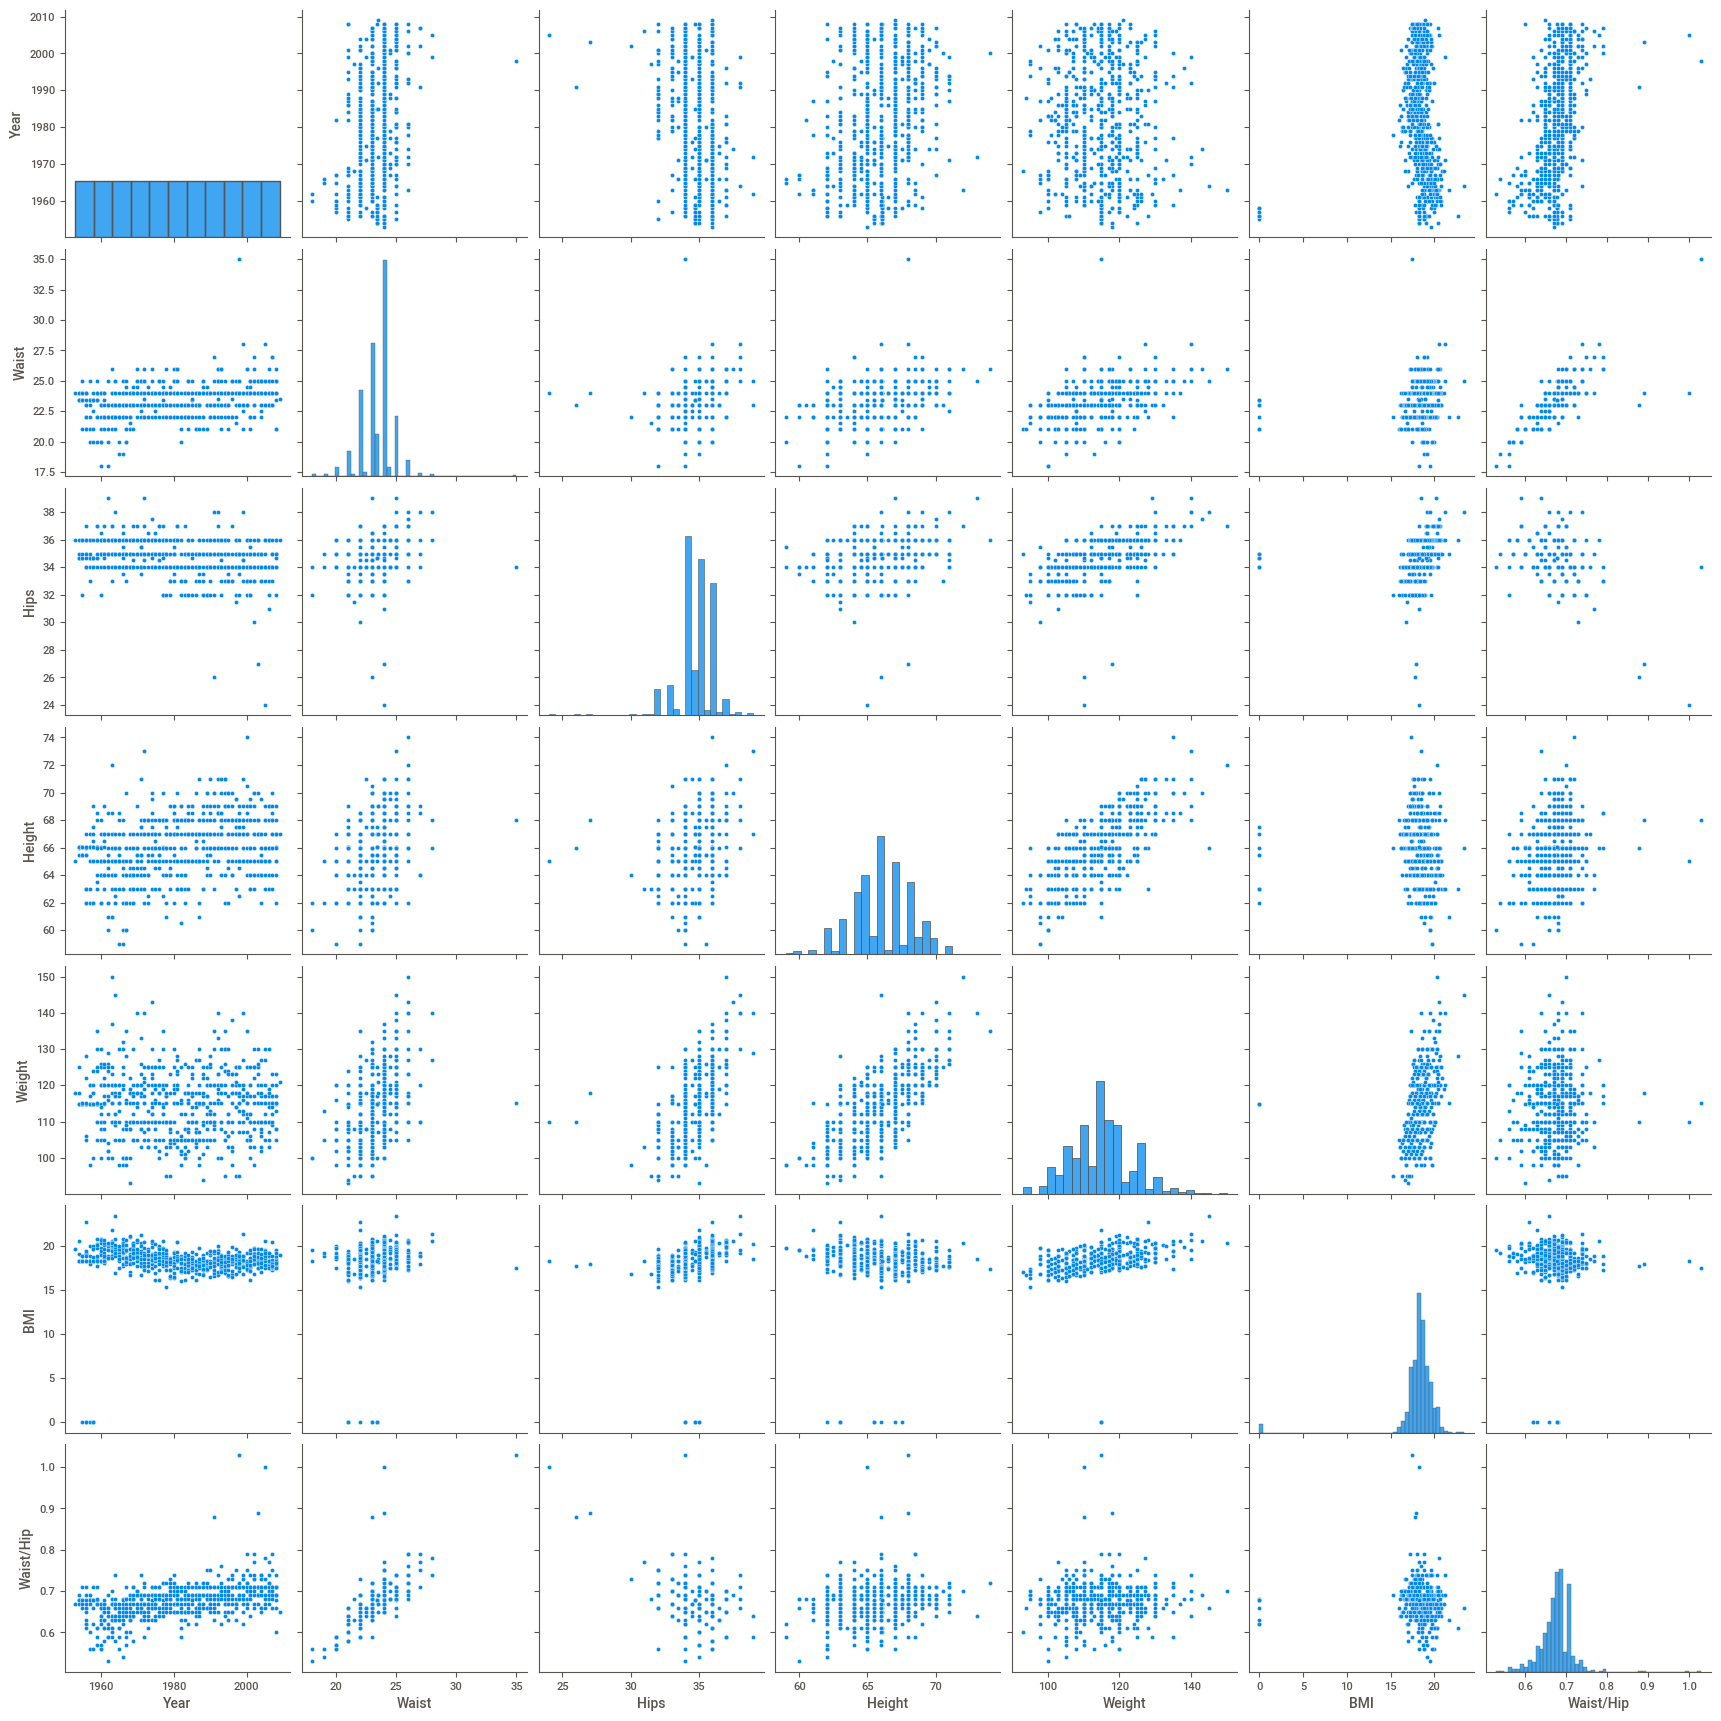

In [ ]:
sns.pairplot(df1)

In [ ]:
mask = df1['Weight'].corr(df1['Height'], method = 'spearman') # корреляции Спирмена
p(mask)
mask = df1['Weight'].corr(df1['Height'], ) #Пирсен
p(mask)
mask = df1['Weight'].corr(df1['Height'], method = 'kendall') # Кендала
p(mask)

0.6867008591668008
0.7065690261409548
0.5387278581117253


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB
None


In [ ]:
print(statistics.mean(df1['Weight']))
print(statistics.mean(df1['Height']))


114.93606557377049
66.05725806451613


0.7065690261409548


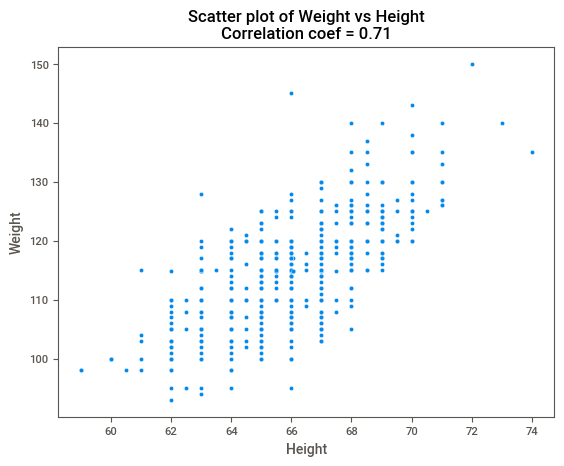

In [ ]:
import seaborn as sns 
mask = df1['Weight'].corr(df1['Height'])
print(mask)

import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, df1 имеет колонки 'Weight' и 'Height'

sns.scatterplot(data=df1, x='Height', y='Weight')
plt.title(f"Scatter plot of Weight vs Height\nCorrelation coef = {mask:.2f}")
plt.show()

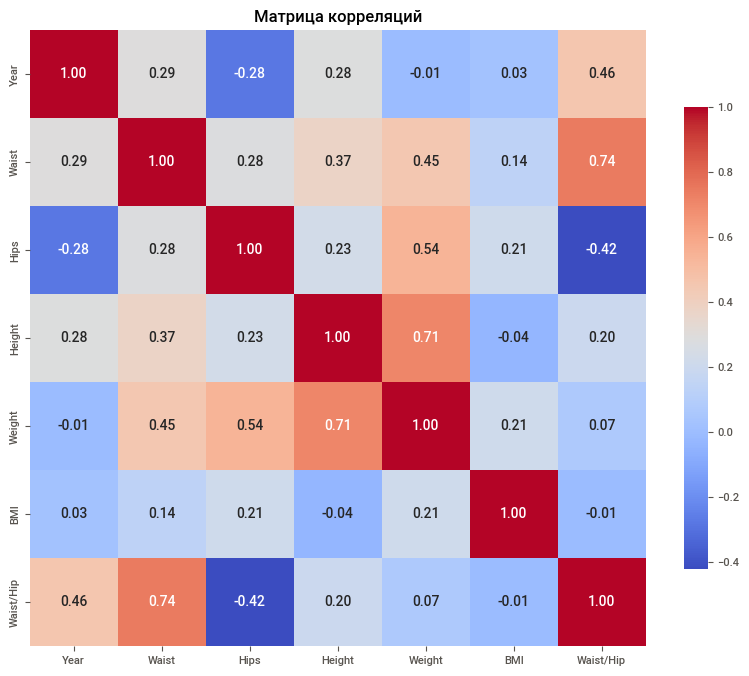

In [ ]:



# 1. Выберите числовые столбцы (игнорируем нечисловые, чтобы избежать ошибок)
numeric_df = df1.select_dtypes(include='number')

# 2. Рассчитайте матрицу корреляций (например, корреляцию Пирсона)
corr_matrix = numeric_df.corr(method='pearson')

# 3. Построение тепловой карты (heatmap)
plt.figure(figsize=(10, 8))  # размер графика
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .75})

plt.title('Матрица корреляций')
plt.show()


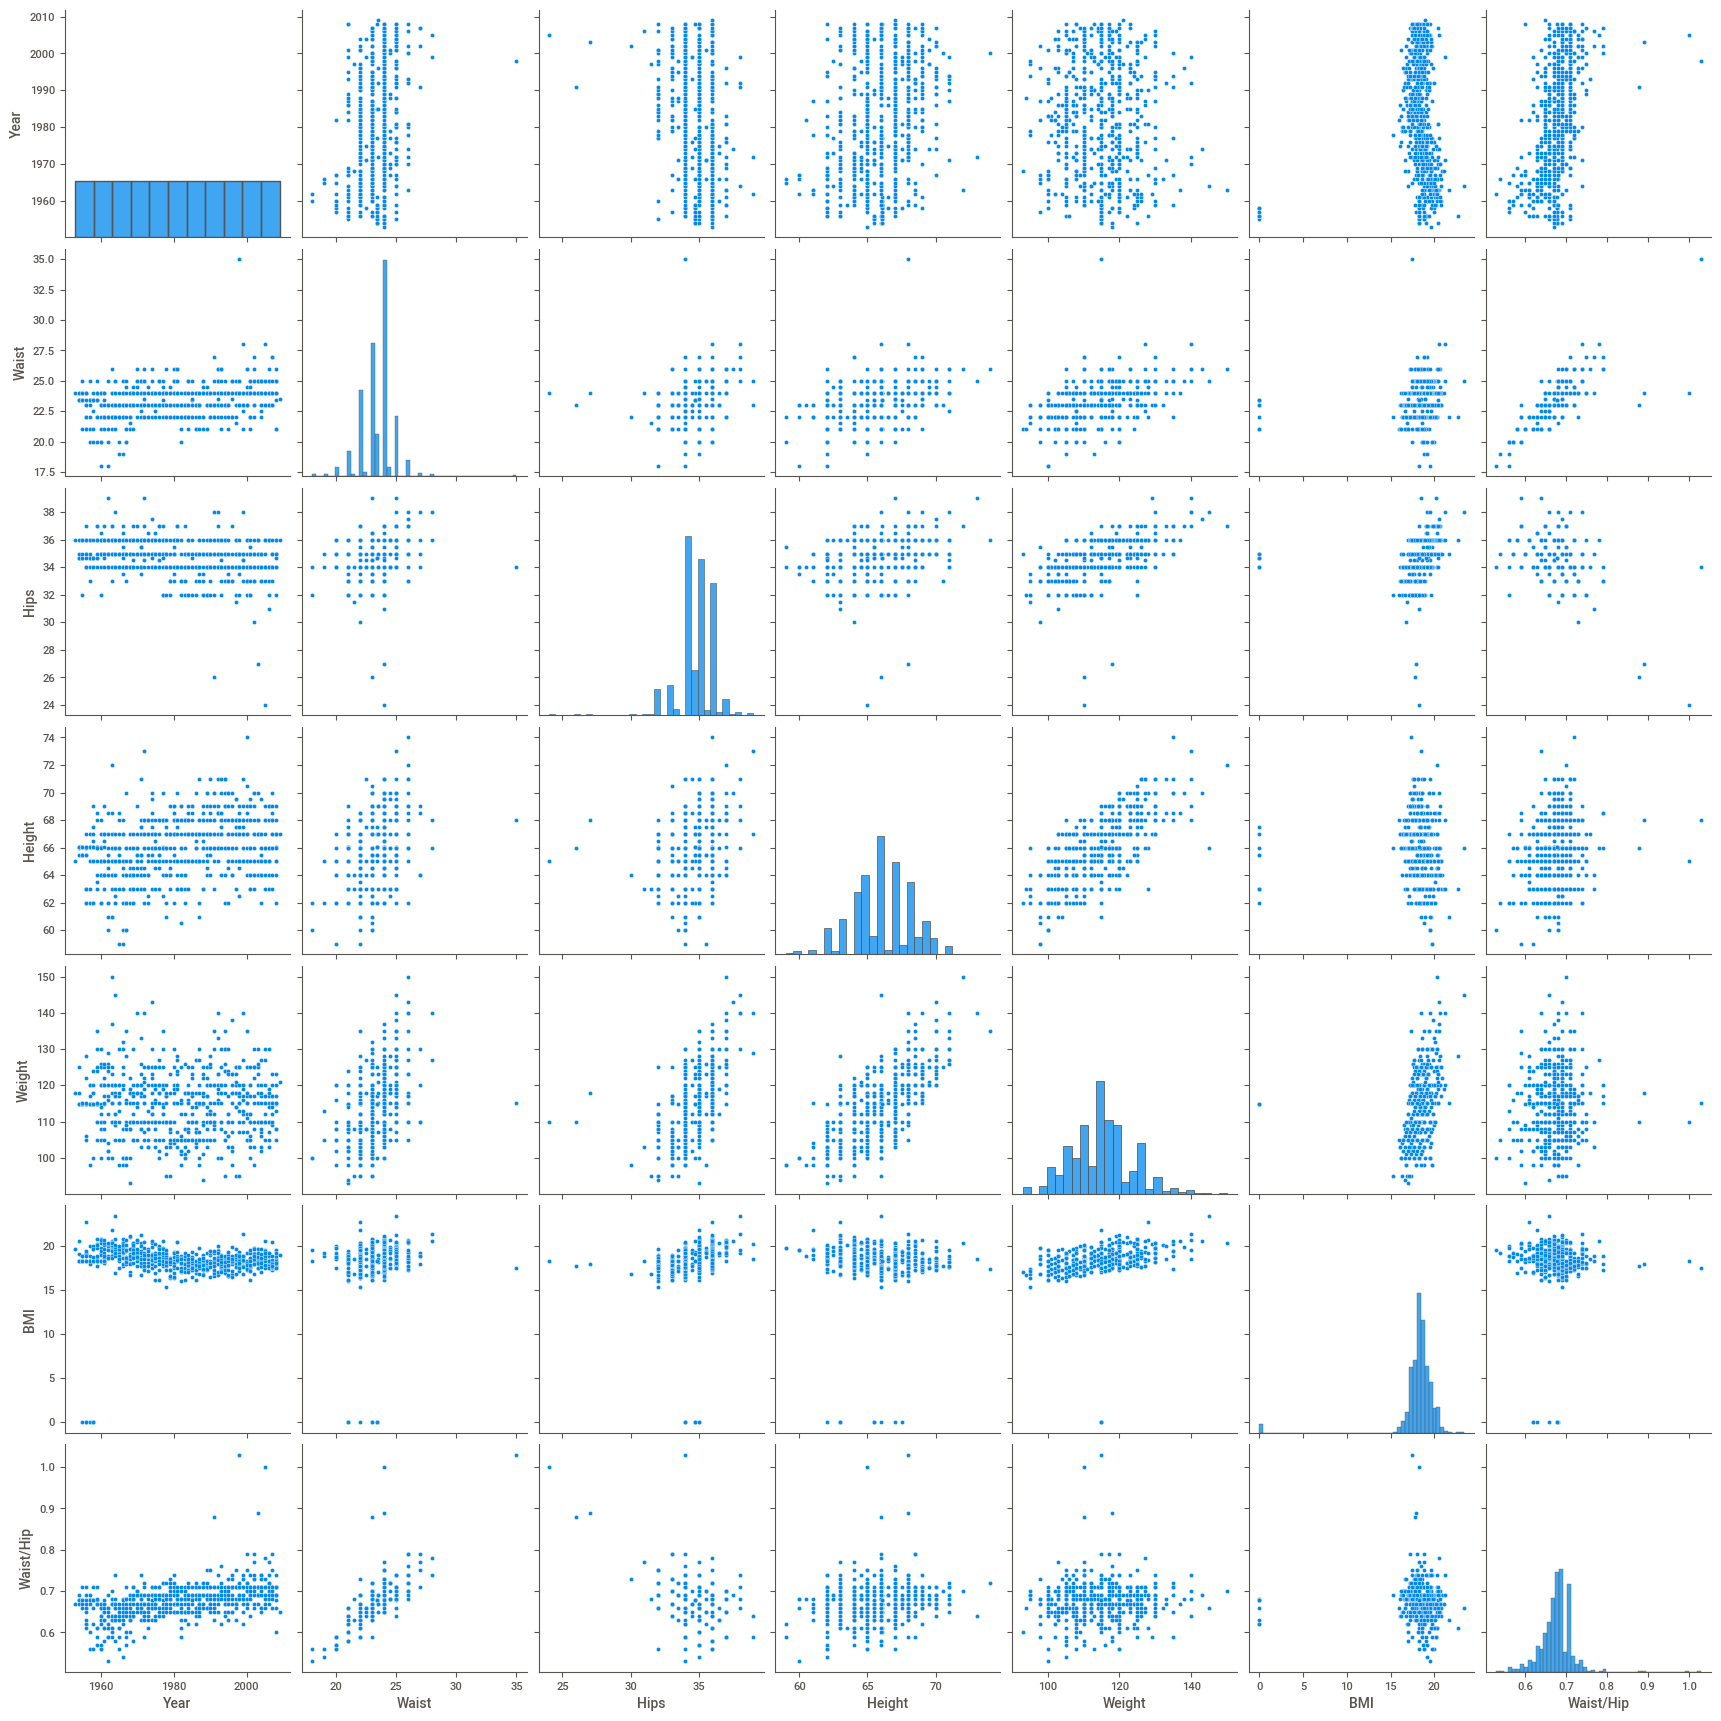

In [ ]:
sns.pairplot(df1)

In [ ]:
# для удобства сразу преобразуем признак в int
# df1['price_round'] = df1['price'].round().astype(int)  - убрал признак
#df1['is_usa'] = df1['country'].apply(lambda x: 1 if x == 'US' else 0)
#df1['is_italy'] = df1['country'].apply(lambda x: 1 if x == 'Italy' else 0)
regex = r'\d{4}' # регулярное выражение для нахождения чисел
#df1['year'] = df1['title'].str.findall(regex).str.get(0)


In [ ]:
p(df2['country'].value_counts())
#p(df2['is_france'].sum(), df2['is_italy'].sum())

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [ ]:
p(df1.columns)

Index(['Month', 'Year', 'Waist', 'Hips', 'Height', 'Weight', 'BMI',
       'Waist/Hip', 'price_round'],
      dtype='object')


In [ ]:
regex = r'\d{4}' # регулярное выражение для нахождения чисел
df1['year'] = df1['title'].str.findall(regex).str.get(0)
df1['year'] = df1['year'].fillna('0')
df1['year'] = df1['year'].astype(int)
df1['old_wine'] = df1['year'].apply(lambda x: 1 if x >= 2010 else 0)

KeyError: 'title'

In [ ]:
df1['old_wine'].sum()

KeyError: 'old_wine'

In [ ]:
# преобразуем признак year в объект datetime для удобного сравнения дат
df1['year'] = pd.to_datetime(df1['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
df1['old_wine'] = df1['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
df1['old_wine'].sum()

KeyError: 'year'

In [ ]:
regex = r'\((.*?)\)'
df1['locality'] = df1['title'].str.findall(regex).str.get(0)

KeyError: 'title'

In [ ]:
p(df1['locality'])

KeyError: 'locality'

In [ ]:

import pandas as pd
country_population = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/country_population.csv', sep=';')

p(country_population.loc[country_population['country'] == 'Italy'])


   country  population
24   Italy  59,097,904


In [ ]:
df1.join(country_population.set_index('country'), on='country')

KeyError: 'country'

In [ ]:
import pandas as pd

country_area = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/country_area.csv', sep=';')

data1 = df1.join(country_area.set_index('country'), on='country')
data1['title'] = 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA)'
p(data1.loc['title', 'area'])

KeyError: 'title'

In [ ]:
# Объединяем DataFrame по колонке 'country'
data1 = df1.join(country_area.set_index('country'), on='country')

# Добавляем столбец 'title' с одинаковым значением для всех строк
data1['title'] = 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA)'

# Выводим столбец 'area' целиком
print(data1['area'])

# Или, например, выводим значение 'area' для первой строки
print(data1.loc[data1.index[0], 'area'])


# Найдём строки, где title совпадает с нужным значением
mask = data1['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA)'

# Выведем значения area для таких строк
print(data1.loc[mask, 'area'])

NameError: name 'country_area' is not defined

In [ ]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

# Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds

# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0) 
calls['is_connection'].sum()

calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [ ]:
df2['year'] = pd.to_datetime(df2['year'], errors = 'coerce')

df2['years_diff'] = (pd.to_datetime('2022-01-12') - pd.to_datetime(df2['year'])).dt.days
p(df2['years_diff'].max())


KeyError: 'year'

In [ ]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [ ]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing


,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_dress,type_skirt,type_shirt,type_coat,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,1,0,0,0,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,0,1,0,0,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,1,0,0,0,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,0,1,0,0,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,1,0,0,0,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,0,0,1,0,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,0,0,0,1,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,0,0,0,1,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,0,0,1,0,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,1,0,0,0,1,0,0,0,False,True,False,False


In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data

KeyError: 'taster_name'

In [ ]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['product', 'payment_type'], use_cat_names=True)
type_bin = encoder.fit_transform(df[['product','payment_type']])
data = pd.concat([df, type_bin], axis=1)

data

,product,price,payment_type,product_Product1,product_Product2,product_Product3,payment_type_Mastercard,payment_type_Visa,payment_type_Amex
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


In [ ]:
import numpy as np 
import pandas as pd

np.random.seed(35)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

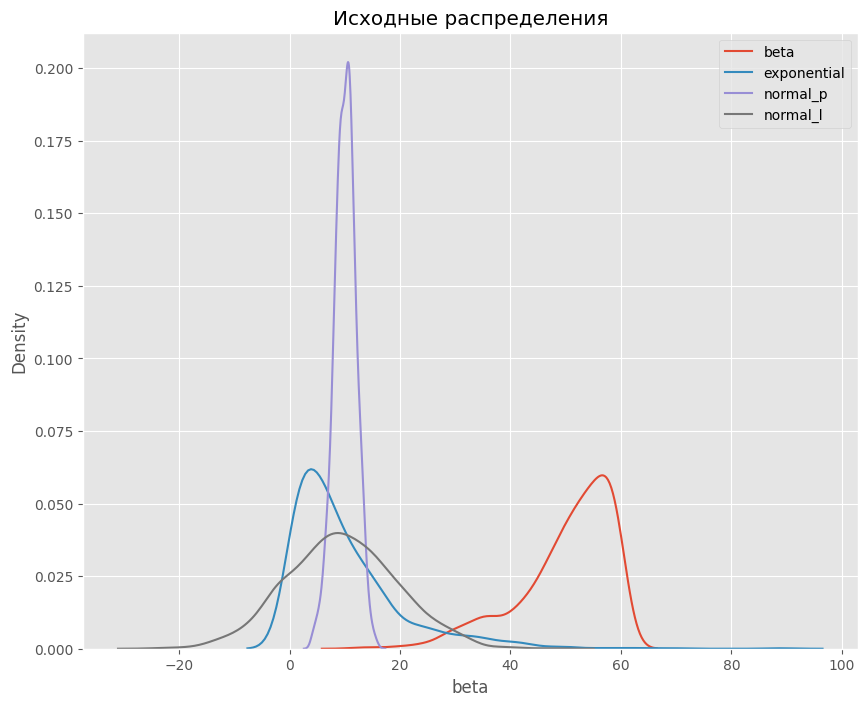

In [ ]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [ ]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.105156,10.116350,10.061609,9.522638
std,8.621600,10.132913,1.954322,9.942806
min,12.338324,0.001817,4.062665,-23.572671
25%,46.088886,3.153939,8.772340,2.787998
50%,52.320300,7.109795,10.149296,9.278682
75%,56.647286,13.540990,11.339436,16.034332
max,59.997345,88.878747,15.863173,47.599608


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

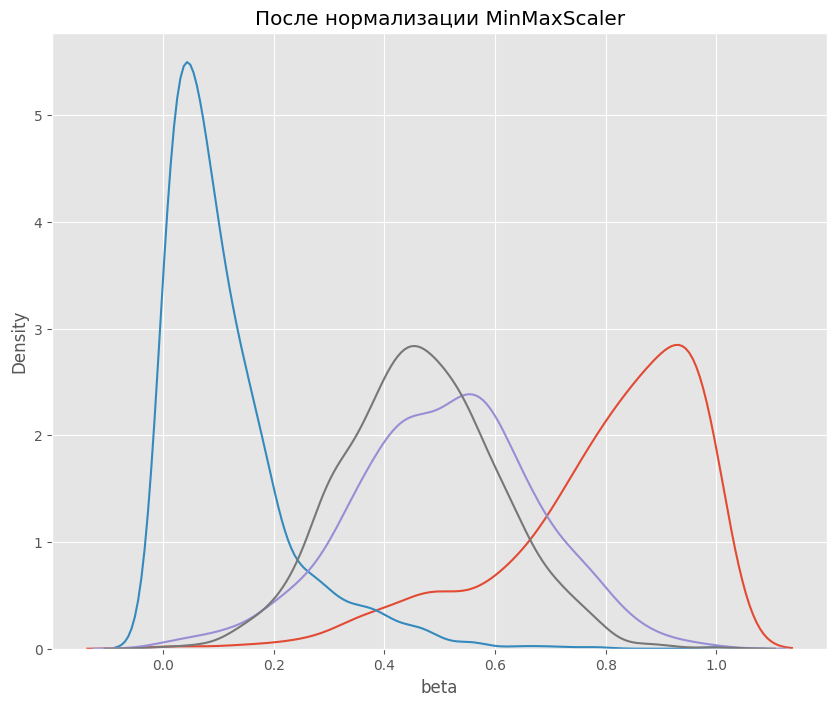

In [ ]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

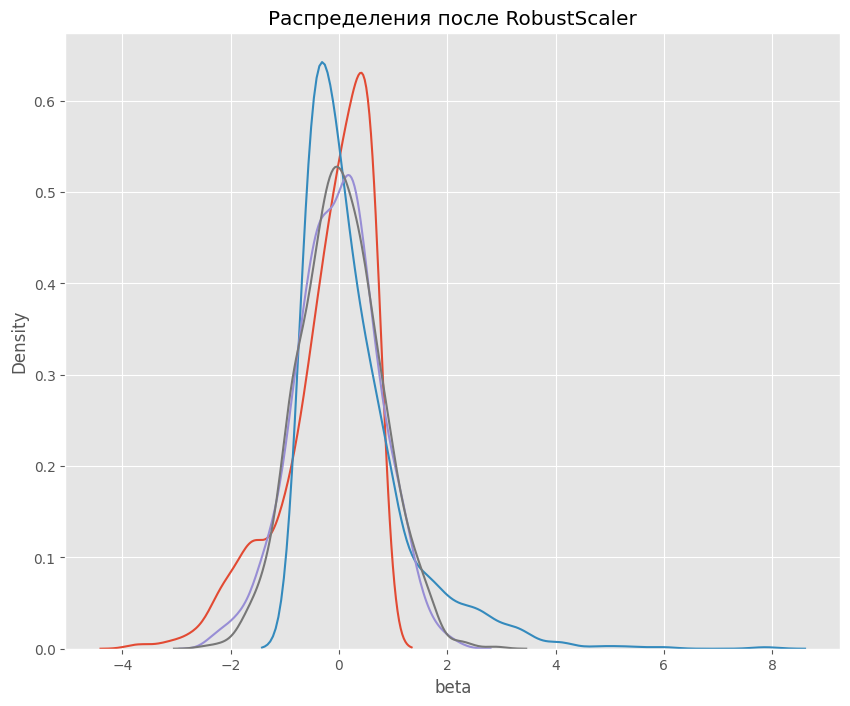

In [ ]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

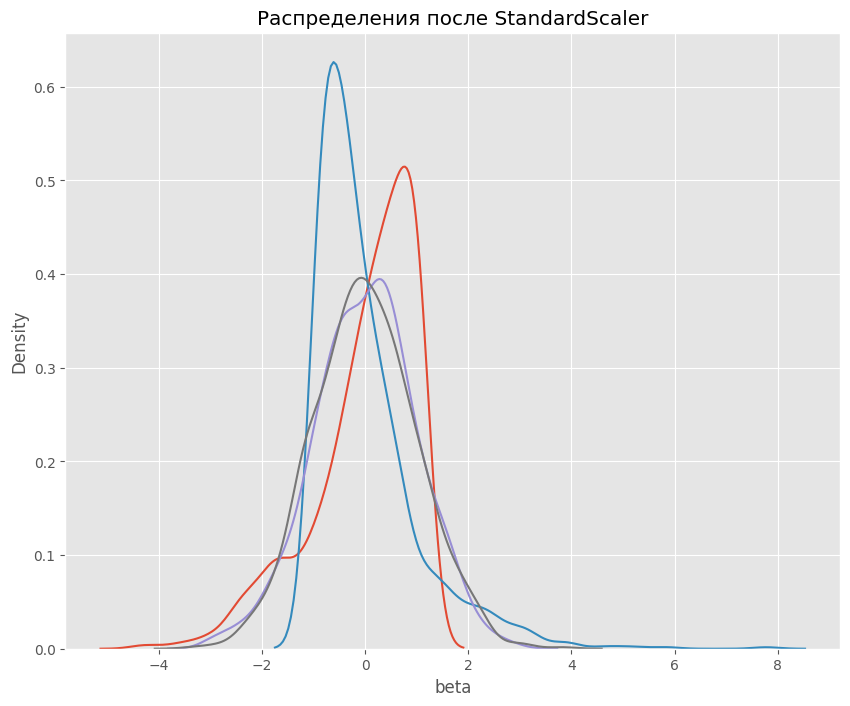

In [ ]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [ ]:

import pandas as pd
from sklearn import preprocessing

# Предположим, что у вас есть датафрейм 'data' с колонкой 'price'
# Пример создания датафрейма (для демонстрации)

# Создаем экземпляр StandardScaler
s_scaler = preprocessing.RobustScaler()

# Кодируем исходный датасет
# fit_transform должен применяться к двумерному массиву, поэтому используем data[['price']]
df_s = s_scaler.fit_transform(data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
# Указываем имя колонки
df_s = pd.DataFrame(df_s, columns=['price_standardized'])

# Выводим результат
print(data['price'].sum())



4274062.169562607


In [ ]:

import pandas as pd
from sklearn import preprocessing

# Предположим, что у вас есть датафрейм 'data' с колонкой 'price'
# Пример создания датафрейма (для демонстрации)

# Создаем экземпляр StandardScaler
s_scaler = preprocessing.StandardScaler()

# Кодируем исходный датасет
# fit_transform должен применяться к двумерному массиву, поэтому используем data[['price']]
df_s = s_scaler.fit_transform(data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
# Указываем имя колонки
df_s = pd.DataFrame(df_s, columns=['price_standardized'])

# Выводим результат
print(df_s)

        price_standardized
0            -1.749935e-16
1            -5.078509e-01
2            -5.324790e-01
3            -5.571072e-01
4             7.235567e-01
...                    ...
119983       -1.876849e-01
119984        9.698382e-01
119985       -1.384286e-01
119986       -8.917230e-02
119987       -3.600820e-01

[119988 rows x 1 columns]


In [ ]:
s_scaler.fit(data[['price']])  # Обучаем скейлер на всей колонке

# Выбираем одно значение для стандартизации (например, значение по индексу 1)
value_to_standardize = data['price'][2]  # Получаем значение
value_to_standardize = [[value_to_standardize]]  # Оборачиваем в двумерный массив

# Стандартизируем одно значение
standardized_value = s_scaler.transform(value_to_standardize)

# Выводим стандартизированное значение
print(f'Стандартизированное значение: {standardized_value[0][0]}')


Стандартизированное значение: -0.5324790382486579


c:\Users\Admin\Desktop\VS Studio\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


     sepal.length  sepal.width  petal.length    variety
0             5.1          3.5           1.4     Setosa
1             4.9          3.0           1.4     Setosa
2             4.7          3.2           1.3     Setosa
3             4.6          3.1           1.5     Setosa
4             5.0          3.6           1.4     Setosa
..            ...          ...           ...        ...
145           6.7          3.0           5.2  Virginica
146           6.3          2.5           5.0  Virginica
147           6.5          3.0           5.2  Virginica
148           6.2          3.4           5.4  Virginica
149           5.9          3.0           5.1  Virginica

[150 rows x 4 columns]


<Axes: >

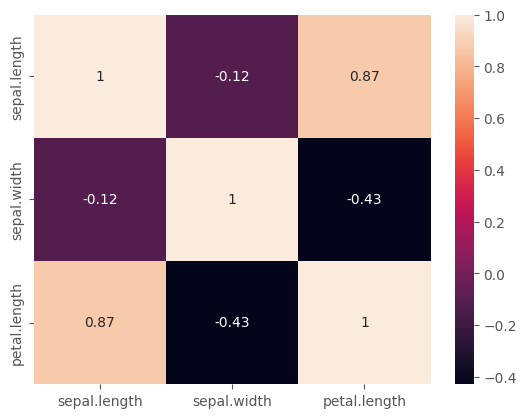

In [ ]:
p(iris)
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [ ]:
iris = iris.drop(['petal.width'], axis=1)
#iris = iris.drop(['petal.length'], axis=1)

<Axes: >

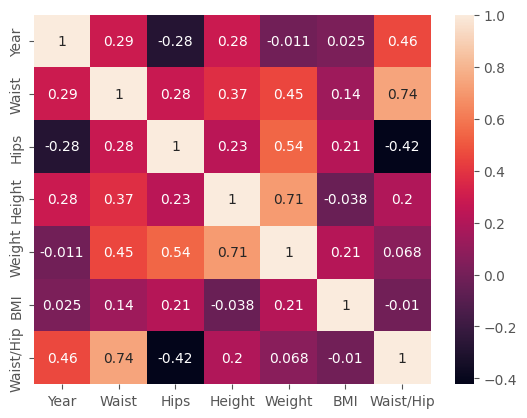

In [ ]:
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df1.corr(numeric_only=True), annot=True)

In [ ]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_mm.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:

from io import StringIO
heart = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/heart.csv')
heart['old'] = heart['age'].apply(lambda x: 1 if x> 60 else 0) 




     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  old  
0        0   0     1       1    1  
1        0   0 

In [ ]:
norms_data = {
    'age_group': ['до 20', '21-30', '31-40', '41-50', '51-60', '61 и старше'],
    'male_sys': [123, 126, 129, 135, 142, 142],
    'male_dia': [76, 79, 81, 83, 85, 80],
    'female_sys': [116, 120, 127, 137, 144, 159],
    'female_dia': [72, 75, 80, 84, 85, 85]
}

norms_df = pd.DataFrame(norms_data)
def get_trestbps_mean(row = heart):
    age = row['age']
    sex = row['sex']
    trestbps =  row['trestbps']
    # Определение возрастной группы
    if age < 20:
        age_group = 'до 20'
    elif age <= 30:
        age_group = '21-30'
    elif age <= 40:
        age_group = '31-40'
    elif age <= 50:
        age_group = '41-50'
    elif age <= 60:
        age_group = '51-60'
    else:
        age_group = '61 и старше'

    if sex == 1:  # Мужчина
        sys_value = norms_df.loc[norms_df['age_group'] == age_group, 'male_sys'].values[0]
        dia_value = norms_df.loc[norms_df['age_group'] == age_group, 'male_dia'].values[0]
    else:  # Женщина
        sys_value = norms_df.loc[norms_df['age_group'] == age_group, 'female_sys'].values[0]
        dia_value = norms_df.loc[norms_df['age_group'] == age_group, 'female_dia'].values[0]

    # Проверка, попадает ли значение в диапазон
    if trestbps <= sys_value and trestbps >= dia_value:
        return 1  # Значение в пределах нормы
    else:
        return 0  # Значение вне нормы

heart['trestbps_mean'] = heart.apply(get_trestbps_mean, axis=1)




In [ ]:
import pandas as pd

# Данные о нормах
norms_data = {
    'age_group': ['до 20', '21-30', '31-40', '41-50', '51-60', '61 и старше'],
    'male_sys': [123, 126, 129, 135, 142, 142],
    'male_dia': [76, 79, 81, 83, 85, 80],
    'female_sys': [116, 120, 127, 137, 144, 159],
    'female_dia': [72, 75, 80, 84, 85, 85]
}
# Создаем DataFrame из норм
norms_df = pd.DataFrame(norms_data)

# Пример данных о пациентах


# Функция для проверки значения trestbps
def check_trestbps(row):
    age = row['age']
    sex = row['sex']
    trestbps = row['trestbps']
    
    # Определение возрастной группы
    if age < 20:
        age_group = 'до 20'
    elif age <= 30:
        age_group = '21-30'
    elif age <= 40:
        age_group = '31-40'
    elif age <= 50:
        age_group = '41-50'
    elif age <= 60:
        age_group = '51-60'
    else:
        age_group = '61 и старше'
    
    if sex == 1:  # Мужчина
        sys_value = norms_df.loc[norms_df['age_group'] == age_group, 'male_sys'].values[0]
        dia_value = norms_df.loc[norms_df['age_group'] == age_group, 'male_dia'].values[0]
    else:  # Женщина
        sys_value = norms_df.loc[norms_df['age_group'] == age_group, 'female_sys'].values[0]
        dia_value = norms_df.loc[norms_df['age_group'] == age_group, 'female_dia'].values[0]

    if trestbps <= sys_value and trestbps >= dia_value:
        return trestbps  # Возвращаем значение, если оно в пределах нормы
    else:
        return None  # Возвращаем None, если значение вне нормы

# Применяем функцию к каждой строке DataFrame
heart['trestbps_normal'] = heart.apply(check_trestbps, axis=1)

# Выводим DataFrame с новым столбцом
print(heart.loc[4, 'trestbps_normal'])


120.0


In [ ]:
heart['trestbps_mean'] = heart.apply(get_trestbps_mean, axis=1)
heart['trestbps_normal'] = heart.apply(check_trestbps, axis=1)
p(heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  old  trestbps_mean  trestbps_normal  
0        0   0     

In [ ]:
heart['trestbps_mean'] = heart.apply(get_trestbps_mean, axis=1)
heart['trestbps_normal'] = heart.apply(check_trestbps, axis=1)
import pandas as pd
import category_encoders as ce

heart = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/heart.csv')

# Определяем признаки для кодирования
features_to_encode = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Инициализируем OneHotEncoder
encoder = ce.OneHotEncoder(cols=features_to_encode, use_cat_names=True)

# Применяем кодирование
heart_encoded = encoder.fit_transform(heart)

# Удаляем исходные признаки
#heart_encoded = heart_encoded.drop(features_to_encode, axis=1)

# Выводим результат
print(heart_encoded)

# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()


     age  sex  cp_3.0  cp_2.0  cp_1.0  cp_0.0  trestbps  chol  fbs  \
0     63    1       1       0       0       0       145   233    1   
1     37    1       0       1       0       0       130   250    0   
2     41    0       0       0       1       0       130   204    0   
3     56    1       0       0       1       0       120   236    0   
4     57    0       0       0       0       1       120   354    0   
..   ...  ...     ...     ...     ...     ...       ...   ...  ...   
298   57    0       0       0       0       1       140   241    0   
299   45    1       1       0       0       0       110   264    0   
300   68    1       0       0       0       1       144   193    1   
301   57    1       0       0       0       1       130   131    0   
302   57    0       0       0       1       0       130   236    0   

     restecg_0.0  ...  ca_0.0  ca_2.0  ca_1.0  ca_3.0  ca_4.0  thal_1.0  \
0              1  ...       1       0       0       0       0         1   
1        

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,0.399340,0.729373,0.313531,-0.455446
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.616226,1.022606,0.612277,0.498835
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,-2.000000,-1.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,1.000000,4.000000,1.000000,0.000000


In [ ]:
heart['trestbps_mean'] = heart.apply(get_trestbps_mean, axis=1)
heart['trestbps_normal'] = heart.apply(check_trestbps, axis=1)
heart['old'] = heart['age'].apply(lambda x: 1 if x> 60 else 0) 
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_mean,trestbps_normal,old
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,231.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,0.399340,0.729373,0.313531,-0.455446,-0.237624,-0.018553,0.260726
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.616226,1.022606,0.612277,0.498835,0.426332,0.843978,0.439757
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,-2.000000,-1.000000,-1.000000,-2.214286,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,1.000000,4.000000,1.000000,0.000000,0.000000,2.142857,1.000000


<Axes: >

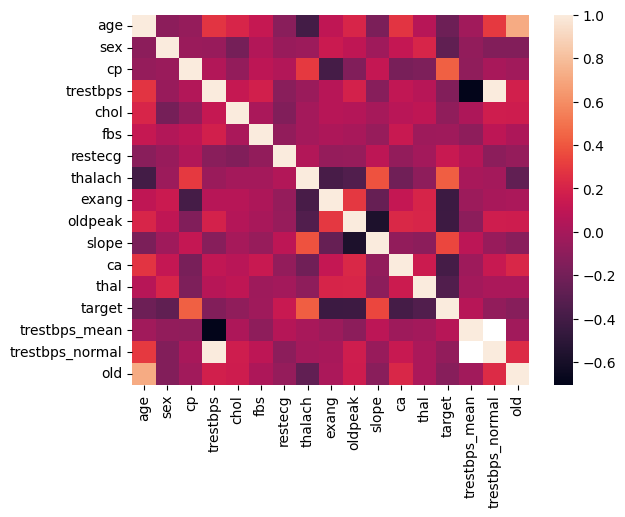

In [ ]:
import seaborn as sns
heart_r1 = round(heart_r,2)
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(heart_r.corr(numeric_only=True), annot=False)

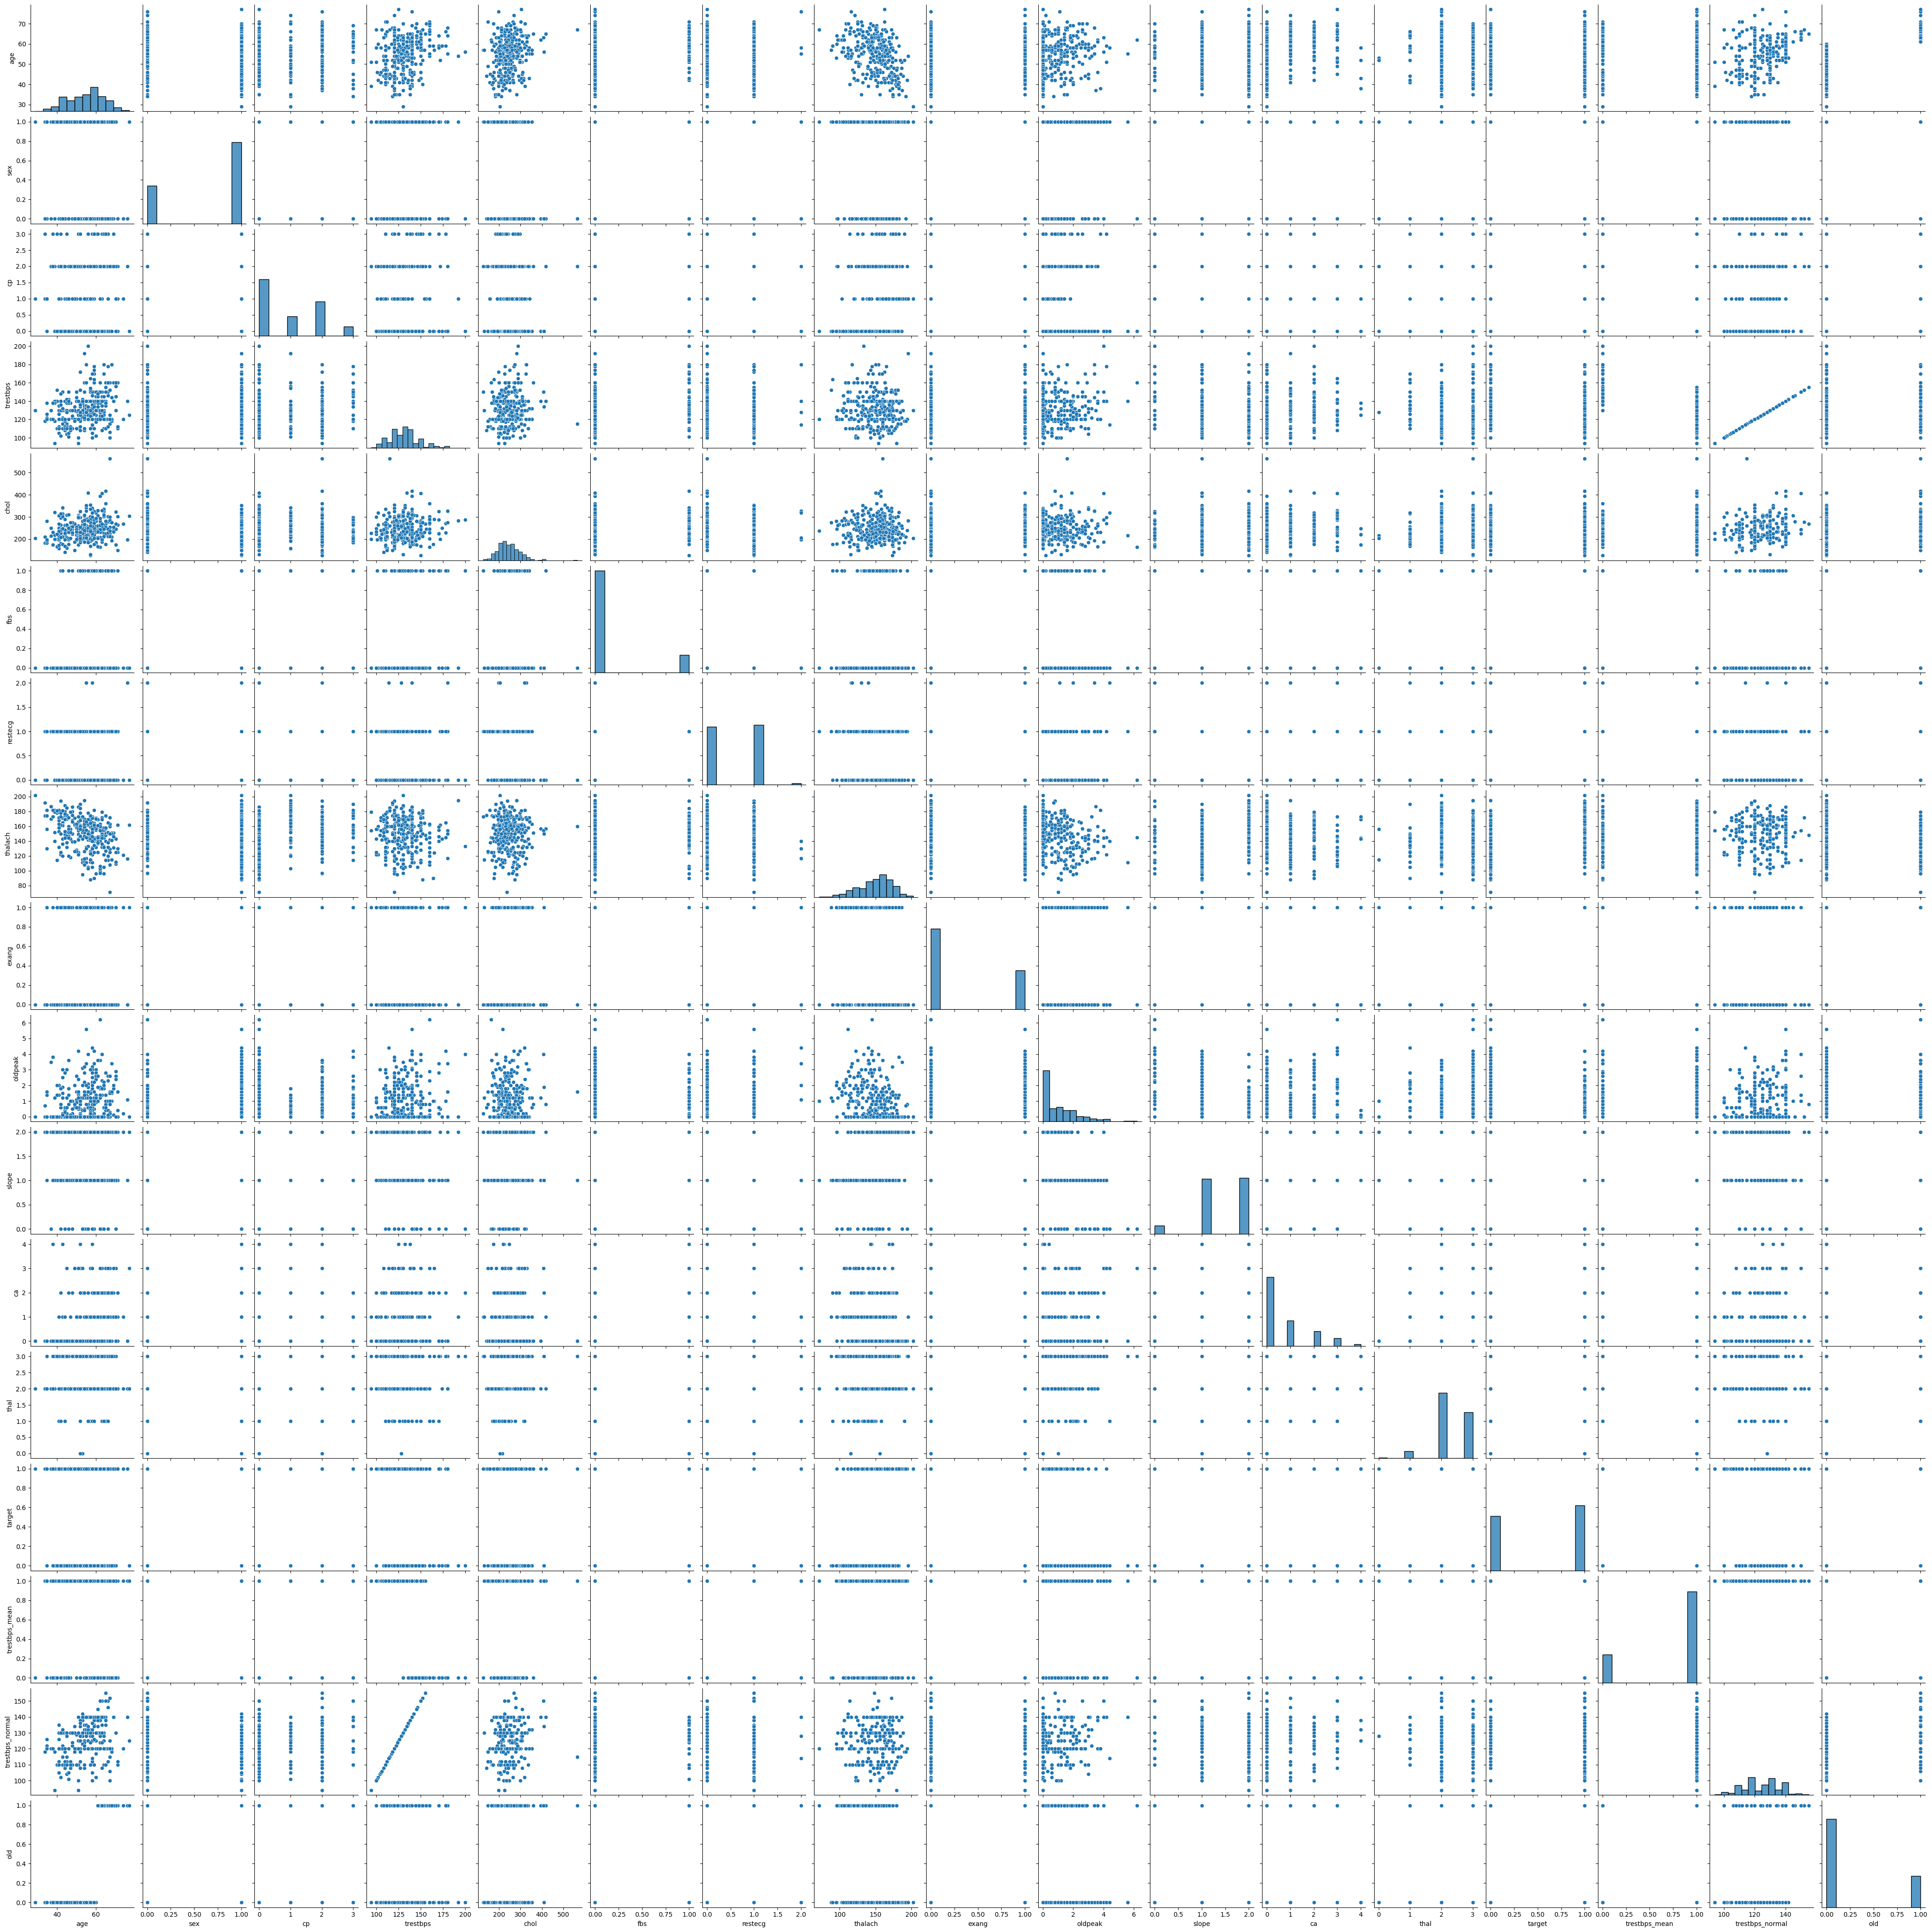

In [ ]:
sns.pairplot(heart)

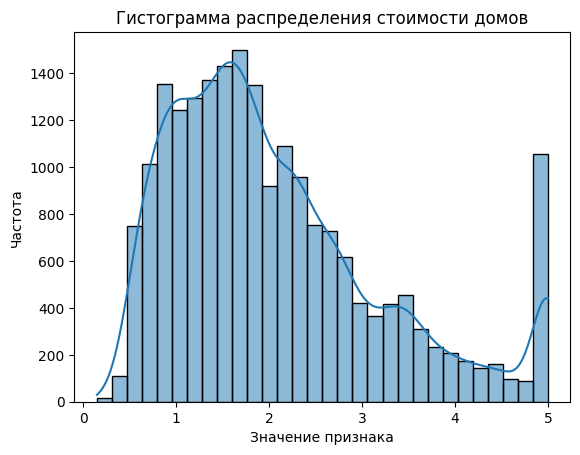

In [11]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

In [12]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.414
Распределение нормальное


In [16]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


In [3]:
import numpy as np

data = np.random.normal(0, 1, 1000)  # Нормальные данные
mean = np.mean(data)
std = np.std(data)

# Находим выбросы (вне ±3σ)
outliers = data[(data < mean - 3*std) | (data > mean + 3*std)]
print(f"Найдено выбросов: {len(outliers)}")

Найдено выбросов: 4


In [2]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [4]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

# Тест на равенство средних
# p-value = 0.260
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [1]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [2]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [3]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

#              Anova
# ==================================
#       F Value Num DF Den DF Pr > F
# ----------------------------------
# group  0.0100 2.0000 8.0000 0.9900

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



In [9]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.982
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [1]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_north, data_south, data_east)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(data_north, data_south, data_east)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.150
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [2]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

# проводим тест
_, p = stats.ttest_rel(data_before, data_after, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [1]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [3]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [1]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [2]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.837
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [3]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [6]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

# проводим тест
_, p = stats.wilcoxon(data_before, data_after, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.742
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [9]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

# проводим тест
_, p = sign_test(data, 75)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [11]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

# проводим тест
_, p = stats.kruskal(data_tariffs, data_offers, data_support)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.837
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [1]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/cat_variables_tarif_children.csv', sep = ',')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.373
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [2]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/cat_variables_usage.csv', sep = ',')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.013
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [5]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], 
['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], 
['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], 
['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], 
['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])


# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Старая форма'], data['Новая форма'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.013
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [6]:
pd.crosstab(data['Старая форма'], data['Новая форма'])

Новая форма,Есть,Нет
Старая форма,,
Есть,7,3
Нет,12,8
